In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler

In [5]:
segmented_data = pd.read_csv("segmentation data.csv")
legend_data = pd.read_excel("segmentation data legend.xlsx")


In [17]:
segmented_data

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


In [6]:
segmented_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [7]:
segmented_data.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


array([[<Axes: title={'center': 'ID'}>, <Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'Marital status'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'Income'}>],
       [<Axes: title={'center': 'Occupation'}>,
        <Axes: title={'center': 'Settlement size'}>, <Axes: >]],
      dtype=object)

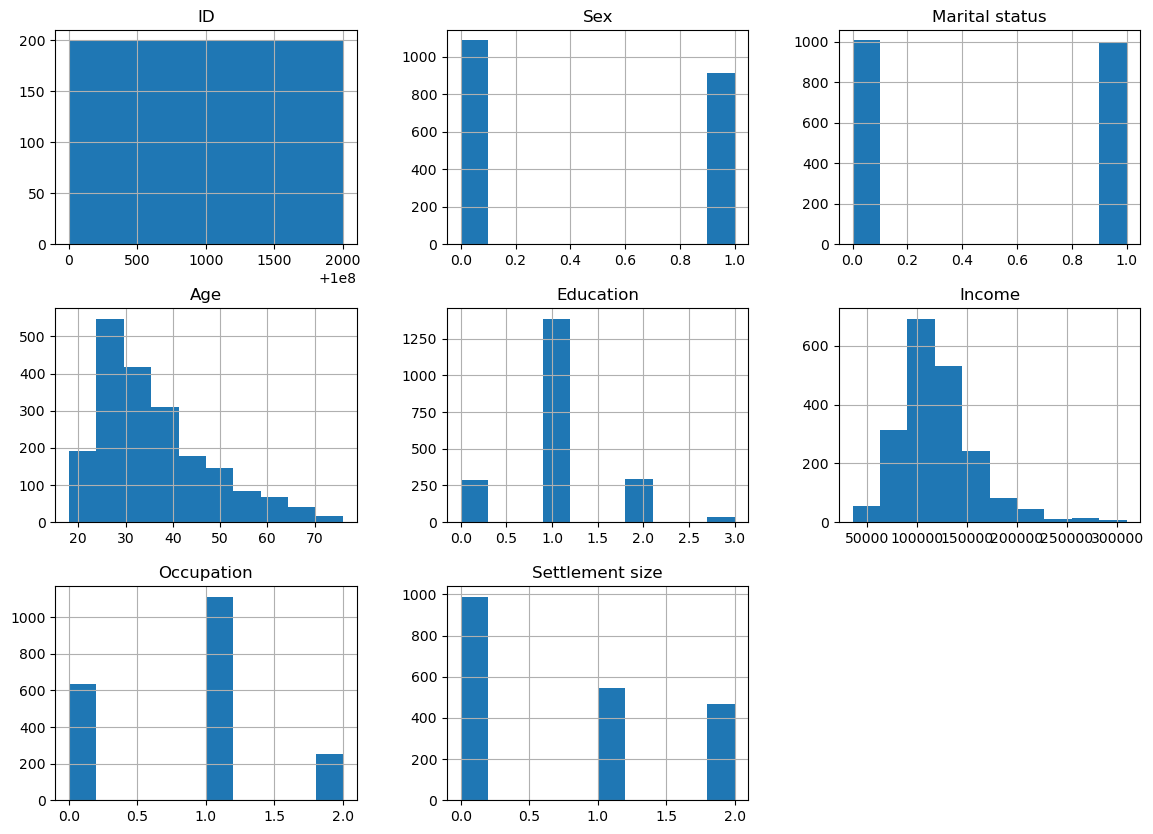

In [9]:
segmented_data.hist(figsize=(14,10))

In [73]:
X = segmented_data.iloc[:, [5, 6]].values  
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [74]:
wcss = []  
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

C:\Users\Sridevi\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sridevi\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sridevi\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sridevi\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sridevi\New folder\lib\site-package

Text(0.5, 1.0, 'Elbow Method')

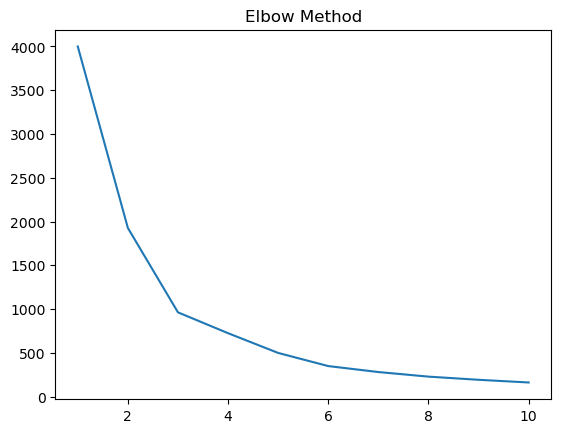

In [75]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')

In [76]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(X_scaled)
segmented_data['KMeans Cluster'] = kmeans.labels_

C:\Users\Sridevi\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [77]:
kmedoids = KMedoids(n_clusters=3, random_state=42)
kmedoids.fit(X_scaled)
segmented_data['KMedoids Cluster'] = kmedoids.labels_

Text(0.5, 1.0, 'K-Means Clustering')

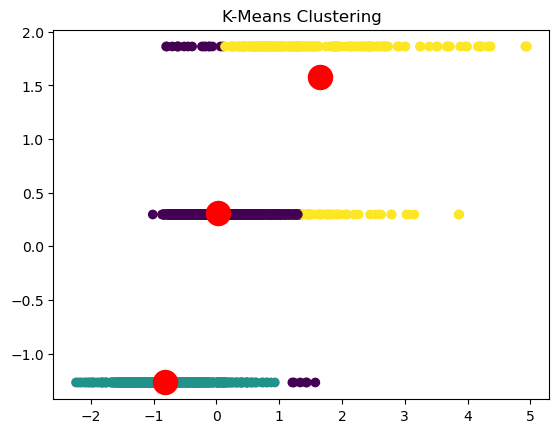

In [78]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('K-Means Clustering')

Text(0.5, 1.0, 'K-Medoids Clustering')

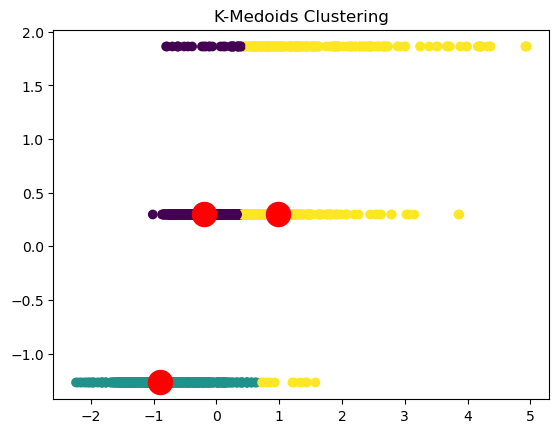

In [79]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmedoids.labels_, cmap='viridis')
plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1], s=300, c='red', label='Medoids')
plt.title('K-Medoids Clustering')

In [80]:
segmented_data["cluster"]=kmeans.fit_predict(X)

C:\Users\Sridevi\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [81]:
segmented_data

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,KMeans Cluster,KMedoids Cluster,cluster
0,100000001,0,0,67,2,124670,1,2,0,0,0
1,100000002,1,1,22,1,150773,1,2,0,2,0
2,100000003,0,0,49,1,89210,0,0,1,1,1
3,100000004,0,0,45,1,171565,1,1,0,2,2
4,100000005,0,0,53,1,149031,1,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0,1,1,0
1996,100001997,1,1,27,1,117744,1,0,0,0,0
1997,100001998,0,0,31,0,86400,0,0,1,1,1
1998,100001999,1,1,24,1,97968,0,0,1,1,1


In [64]:
X = segmented_data.iloc[:, [6, 7]].values  
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [65]:
wcss = []  

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

C:\Users\Sridevi\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sridevi\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sridevi\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sridevi\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sridevi\New folder\lib\site-package

Text(0.5, 1.0, 'Elbow Method')

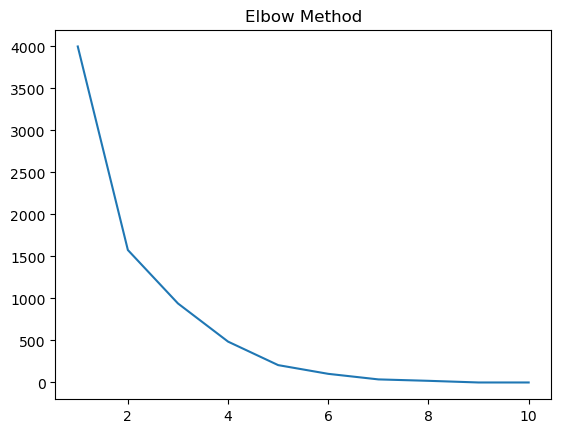

In [66]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')

In [67]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
kmeans.fit(X_scaled)
segmented_data['KMeans Cluster'] = kmeans.labels_

C:\Users\Sridevi\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'K-Means Clustering')

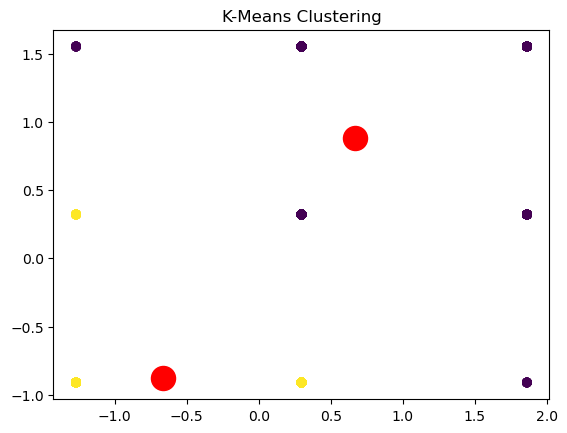

In [68]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('K-Means Clustering')

In [69]:
kmedoids = KMedoids(n_clusters=2, random_state=42)
kmedoids.fit(X_scaled)
segmented_data['KMedoids Cluster'] = kmedoids.labels_

C:\Users\Sridevi\New folder\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(


Text(0.5, 1.0, 'K-Medoids Clustering')

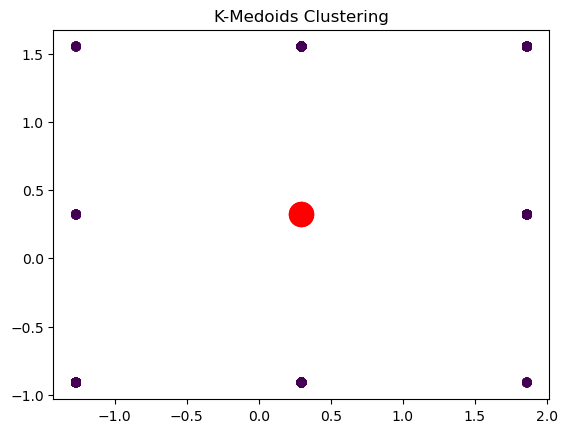

In [70]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmedoids.labels_, cmap='viridis')
plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1], s=300, c='red', label='Medoids')
plt.title('K-Medoids Clustering')

In [71]:
segmented_data["cluster"]=kmeans.fit_predict(X)

C:\Users\Sridevi\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [72]:
segmented_data

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,KMeans Cluster,KMedoids Cluster,cluster
0,100000001,0,0,67,2,124670,1,2,0,0,0
1,100000002,1,1,22,1,150773,1,2,0,0,0
2,100000003,0,0,49,1,89210,0,0,1,0,1
3,100000004,0,0,45,1,171565,1,1,0,0,0
4,100000005,0,0,53,1,149031,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0,1,0,1
1996,100001997,1,1,27,1,117744,1,0,1,0,1
1997,100001998,0,0,31,0,86400,0,0,1,0,1
1998,100001999,1,1,24,1,97968,0,0,1,0,1


In [85]:
X = segmented_data.iloc[:, [7]].values  
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [86]:
wcss = []  

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

C:\Users\Sridevi\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sridevi\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sridevi\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sridevi\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sridevi\AppData\Local\Temp\ipykerne

Text(0.5, 1.0, 'Elbow Method')

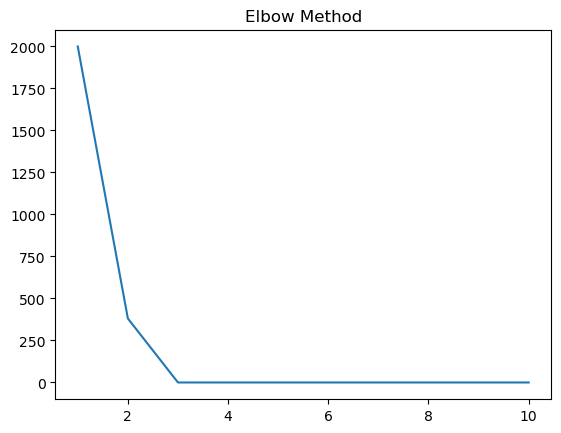

In [87]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')

In [88]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(X_scaled)
segmented_data['KMeans Cluster'] = kmeans.labels_

C:\Users\Sridevi\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'K-Means Clustering')

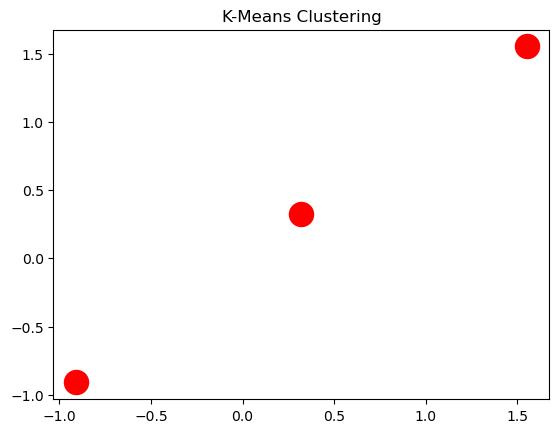

In [91]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 0], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 0], s=300, c='red', label='Centroids')
plt.title('K-Means Clustering')

In [92]:
kmedoids = KMedoids(n_clusters=2, random_state=42)
kmedoids.fit(X_scaled)
segmented_data['KMedoids Cluster'] = kmedoids.labels_

C:\Users\Sridevi\New folder\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(


Text(0.5, 1.0, 'K-Medoids Clustering')

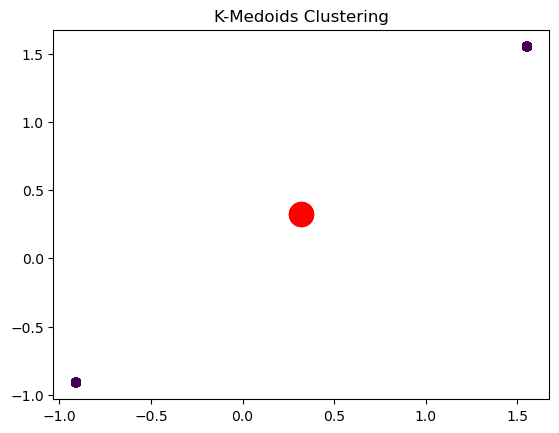

In [94]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 0], c=kmedoids.labels_, cmap='viridis')
plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 0], s=300, c='red', label='Medoids')
plt.title('K-Medoids Clustering')